In [114]:
import numpy as np
import plotly.offline as offline
from plotly.graph_objs import *

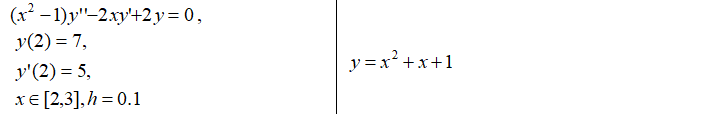

In [115]:
def fxyz(x, y, z):
  return (2 * x * z - 2 * y) / (x**2 - 1)

In [116]:
def y_point(x):
  return x**2 + x + 1

Точки для функции 

In [131]:
def x_list(a, b, h):
    return list(np.arange(a, b + h, h))

-------------

**Погрешность методом Рунге – Ромберга**

In [136]:
def runge_romberg(sol1, sol2, p):
    res = sum((sol1[i * 2] - sol2[i]) ** 2 for i in range(len(sol2)))
    return (res ** 0.5) / (2 ** p - 1)

---------------

In [137]:
# начальные условия : 
a = 2
b = 3
h = 0.1

y0 = 7
z0 = 5

# блок значений для х с шагом h
x = x_list(a, b, h)
x_ = x_list(a, b, h / 2)
solution = [y_point(i) for i in x]

solution

[7.0,
 7.51,
 8.040000000000001,
 8.590000000000002,
 9.160000000000002,
 9.750000000000004,
 10.360000000000003,
 10.990000000000004,
 11.640000000000004,
 12.310000000000006,
 13.000000000000007]

**Метод Эйлера**

In [120]:
def method_euler(x, y0, z0, h):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1): # y_k+1 = y_k + h * f(x_k, y_k)
        y.append(y[k] + h * z[k])
        z.append(z[k] + h * fxyz(x[k], y[k], z[k]))
    return y, z

In [121]:
result_euler, diff_result_euler = method_euler(x, y0, z0, h)
result_euler

[7,
 7.5,
 8.02,
 8.560058651026392,
 9.12022818914956,
 9.700555492894201,
 10.301082910507423,
 10.921848918396593,
 11.562888653003162,
 12.224234346007126,
 12.905915684482165]

Погрешность методом Рунге – Ромберга для метода Эйлера

In [122]:
p = 1
result_euler_, diff_result_euler_ = method_euler(x_, y0, z0, h/2)

runge_romberg(result_euler_, result_euler, p)

0.09539519210916597

---------

**Метод Рунге-Кутты 4-го порядка**


In [123]:
def runge_kutta(x, y0, z0, h):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        K1 = h * z[k]
        L1 = h * fxyz(x[k], y[k], z[k])
        K2 = h * (z[k] + L1/2)
        L2 = h * fxyz(x[k] + h/2, y[k] + K1/2, z[k] + L1/2)
        K3 = h * (z[k] + L2/2)
        L3 = h * fxyz(x[k] + h/2, y[k] + K2/2, z[k] + L2/2)
        K4 = h * (z[k] + L3)
        L4 = h * fxyz(x[k] + h, y[k] + K3, z[k] + L3)

        delta = ((K1 + 2 * K2 + 2 * K3 + K4) / 6, (L1 + 2 * L2 + 2 * L3 + L4) / 6)
        
        y.append(y[k] + delta[0])
        z.append(z[k] + delta[1])
    return y, z

In [124]:
result_runge, diff_result_runge = runge_kutta(x, y0, z0, h)
result_runge

[7,
 7.510000166569061,
 8.0400003297121,
 8.590000491967928,
 9.16000065519995,
 9.750000820804896,
 10.360000989848992,
 10.990001163159294,
 11.640001341386474,
 12.31000152504892,
 13.000001714564299]

Погрешность методом Рунге – Ромберга для Метода Рунге-Кутты 4-го порядка

In [125]:
p = 4

result_runge_, diff_result_runge_ = runge_kutta(x_, y0, z0, h/2)
runge_romberg(diff_result_runge_, diff_result_runge, p)

2.08954443441421e-07

--------------

**Метод Адамса 4-го порядка**

In [126]:
def adams(x, y0, z0, h):
    y, z =  runge_kutta(x[:4], y0, z0, h) # начальные условия через одношаговый метод Рунге-Кутты 4-го порядка

    for k in range(3, len(x) - 1):
        adams_y = y[k] + h * (55 * z[k] - 59 * z[k - 1] + 37 * z[k - 2] - 9 * z[k - 3]) / 24

        adams_z = z[k] + h * (55 * fxyz(x[k], y[k], z[k]) - 
        59 * fxyz(x[k - 1], y[k - 1], z[k - 1]) +
        37 * fxyz(x[k - 2], y[k - 2], z[k - 2]) -
        9 * fxyz(x[k - 3], y[k - 3], z[k - 3])) / 24

        y.append(adams_y)
        z.append(adams_z)
    return y, z

In [127]:
result_adams, diff_result_adams = adams(x, y0, z0, h)
result_adams

[7,
 7.510000166569061,
 8.0400003297121,
 8.590000491967928,
 9.160000565490698,
 9.750000628987861,
 10.360000709470556,
 10.990000792478256,
 11.640000878408921,
 12.31000096955879,
 13.000001065458894]

Погрешность методом Рунге – Ромберга для Метода Адамса 4-го порядка

In [128]:
p = 4

result_adams_, diff_result_adams_ = adams(x_, y0, z0, h/2)
runge_romberg(result_adams_, result_adams, p)

1.4395289475171464e-07

----

**Графики**

In [135]:
scatter_point = Scatter(x = x, y = solution, name = 'Point Solution', mode = 'markers + lines', showlegend = True)
scatter_euler = Scatter(x = x, y = result_euler, name = 'Euler method', mode = 'markers + lines', showlegend = True)
scatter_runge_kutta = Scatter(x = x, y = result_runge, name = 'Runge-Kutta metod', mode = 'markers + lines', showlegend = True)
scatter_adams = Scatter(x = x, y = result_adams, name = 'Adams method', mode = 'markers + lines', showlegend = True)
data = [scatter_point, scatter_euler, scatter_runge_kutta, scatter_adams]
layout = Layout(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'))
fig = Figure(data = data, layout = layout)
offline.iplot(fig)